# ML Data Cleaning and Feature Selection

Abstract:

Big  data  being  the  main focuses in industry revolution, enormous data science jobs are required to collect data, process it using machine learning or statistical techniques and  most importantly  report to  the organization’s  management  comprehensively, so we decided to create a Salary prediction model for the Data science job market.
A salary prediction model for data science will accurately estimate the salary based on specialized variables for the field such as country, experience level, employment type, Job title. Most importantly, allowing professionals and students to understand important and demanded skills. This does  not  only  add  value  to  personal  salary  and  career development but also the whole growth of the data  science industry.

Our objective is to develop a ML model that can predict the salary class of a job profile based on - experience level, job title, company location, company size, employee location and employee residence etc.
We will use different regression modules to predict global salaries based on factors such as global job titles, employment types, years, and experience levels.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error
import random

In [48]:
df=pd.read_csv("data.csv")

In [49]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [52]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [53]:
len(df['remote_ratio'].value_counts())

3

## What are the data types? (Only numeric and categorical)

In [54]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [55]:
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

print("\nNumeric Columns:")
print(numeric_columns)

print("\nCategorical Columns:")
print(categorical_columns)


Numeric Columns:
Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

Categorical Columns:
Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


In [56]:
count_Numeric = len(numeric_columns)
print("Number of Numeric Columns:", count_Numeric)

count_Categorical= len(categorical_columns)
print("Number of Categorical Columns:", count_Categorical)

Number of Numeric Columns: 4
Number of Categorical Columns: 7


## Are there missing values?

In [57]:
missing_values = df.isnull().sum()
print(missing_values)
missing_values_count = missing_values[missing_values > 0].shape[0]

if missing_values_count > 0:
    print(f"There are {missing_values_count} columns with missing values.")
    print("\nColumns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("There are no missing values in the dataset.")


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
There are no missing values in the dataset.


## What are the likely distributions of the numeric variables?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

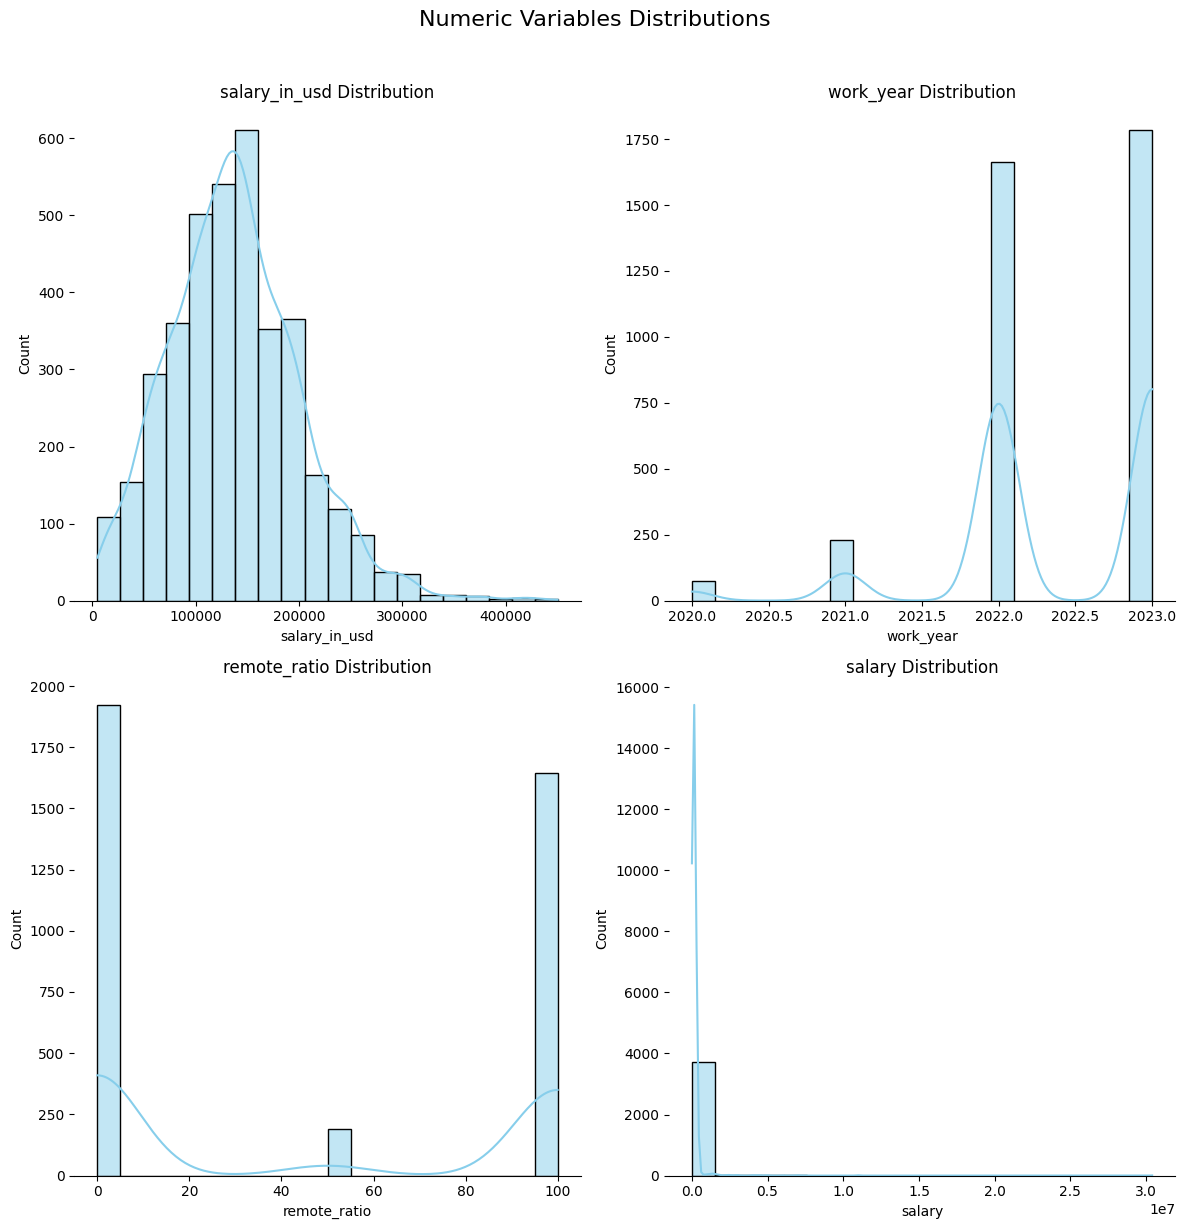

In [58]:

f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False)
sns.despine(left=True)

num_vars = ['salary_in_usd', 'work_year', 'remote_ratio', 'salary']

for i, col in enumerate(num_vars):
    sns.histplot(df[col], kde=True, color='skyblue', bins=20, ax=axes[i // 2, i % 2])  
    axes[i // 2, i % 2].set_title(f'{col} Distribution')  

f.suptitle("Numeric Variables Distributions", y=1.02, fontsize=16)

plt.tight_layout()
plt.show()


There are 4 Numerical Variables:'salary_in_usd', 'work_year', 'remote_ratio', 'salary'

1.salary_in_usd Distribution: 
This distribution appears right-skewed.Most of the data is concentrated on the lower end of the salary range.

2.work_year Distribution: 
The distribution is very unusual as it appears to be multi-modal with significant spikes.

3.remote_ratio Distribution: 
This histogram shows three distinct bars, which might indicate that the 'remote_ratio' variable represents categorical or discrete numerical data.

4.Salary:
The distribution seems right-skewed, meaning that while most of the salaries are clustered around the lower end, there are outliers or exceptions with very high salaries.
    

## Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

We would like to have salary currency as predictor variable. This could be helpful if we want predict salary for role for a location other than USA for e.g. India. We will remove salary_in_usd column to avoid redundent columns about salary.

In [59]:
df.drop(columns=['salary_in_usd'],inplace=True)

We will convert the target variable into a categorical variable by classifying salary into five groups - Very High, High, Intermediate, Low and Very Low

In [60]:
df.drop(columns=['employment_type'],inplace=True)

In [61]:
df.dtypes

work_year              int64
experience_level      object
job_title             object
salary                 int64
salary_currency       object
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [62]:
df['work_year'].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [63]:
len(df['job_title'].value_counts())

93

In [64]:
# Job Title has max types hence we are reducing it to 10 types
df_job_title = df['job_title'].value_counts().to_frame().reset_index()
df_job_title = df_job_title[df_job_title['count'] >= 10]
job_title_list = df_job_title['job_title'].to_list()

In [65]:
df_employee_residence = df['employee_residence'].value_counts().to_frame().reset_index()
df_employee_residence = df_employee_residence[df_employee_residence['count'] >= 10]
employee_residence_list = df_employee_residence['employee_residence'].to_list()

In [66]:
df_company_location = df['company_location'].value_counts().to_frame().reset_index()
df_company_location = df_company_location[df_company_location['count'] >= 10]
company_location_list = df_company_location['company_location'].to_list()

In [67]:
def redefine_categories(row,category):
    if category == 'job_title':
        if row['job_title'] not in job_title_list:
            return 'other'
        else:
            return row['job_title']
    elif category == 'employee_residence':
        if row['employee_residence'] not in employee_residence_list:
            return 'other'
        else:
            return row['employee_residence']
    elif category == 'company_location':
        if row['company_location'] not in company_location_list:
            return 'other'
        else:
            return row['company_location']

In [68]:
df['job_title']=df.apply(lambda row : redefine_categories(row,'job_title'),axis=1)
df['employee_residence']=df.apply(lambda row : redefine_categories(row,'employee_residence'),axis=1)
df['company_location']=df.apply(lambda row : redefine_categories(row,'company_location'),axis=1)

In [69]:
df['work_year'].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [70]:
df['remote_ratio'].value_counts()

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

In [71]:
df['salary_currency'].value_counts()

salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64

In [72]:
df.head()

,work_year,experience_level,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,other,80000,EUR,ES,100,ES,L
1,2023,MI,ML Engineer,30000,USD,US,100,US,S
2,2023,MI,ML Engineer,25500,USD,US,100,US,S
3,2023,SE,Data Scientist,175000,USD,CA,100,CA,M
4,2023,SE,Data Scientist,120000,USD,CA,100,CA,M


## Method 1: Using RandomForestRegressor

In [73]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression

# Assuming df is your DataFrame with both categorical and numeric columns
# Splitting into features (X) and target variable (y)
X = df.drop('salary', axis=1)
y = df['salary']

# One-hot encoding categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)


# Creating and training the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_encoded, y)

# Feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)

dfr = feature_importances[0:20].to_frame().reset_index()

set_rfr = set(dfr['index'].to_list())

print(set_rfr)


{'salary_currency_HUF', 'company_location_IN', 'company_size_S', 'job_title_Data Science Manager', 'job_title_Data Scientist', 'salary_currency_CLP', 'experience_level_SE', 'company_location_other', 'job_title_Data Analyst', 'employee_residence_US', 'work_year', 'experience_level_EN', 'company_size_L', 'salary_currency_INR', 'remote_ratio', 'job_title_Data Engineer', 'job_title_other', 'experience_level_MI', 'salary_currency_JPY', 'experience_level_EX'}


## Method 2 : Using Mutual Info Regression

In [74]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder


# Calculate mutual information scores
mi_scores = mutual_info_regression(X_encoded, y)

# Create a Series with the scores and feature names
mi_scores_series = pd.Series(mi_scores,index=X_encoded.columns)

set_mi = set(mi_scores_series.sort_values(ascending=False)[0:20])
# Display the scores
print(mi_scores_series.sort_values(ascending=False)[0:20])

dfmi = mi_scores_series.sort_values(ascending=False)[0:20].to_frame().reset_index()

set_mi = set(dfmi['index'].to_list())

print(set_mi)

employee_residence_US       0.230830
salary_currency_USD         0.196665
company_location_US         0.196121
experience_level_SE         0.162221
remote_ratio                0.141840
work_year                   0.107490
job_title_Data Analyst      0.096755
experience_level_MI         0.096060
salary_currency_EUR         0.084033
job_title_Data Scientist    0.081989
company_size_M              0.081770
job_title_Data Engineer     0.081404
salary_currency_INR         0.071211
company_location_IN         0.070770
experience_level_EN         0.069202
employee_residence_IN       0.066476
company_size_L              0.062497
employee_residence_GB       0.058388
salary_currency_GBP         0.057598
company_location_GB         0.055740
dtype: float64
{'salary_currency_GBP', 'company_location_IN', 'salary_currency_USD', 'job_title_Data Scientist', 'experience_level_SE', 'salary_currency_EUR', 'job_title_Data Analyst', 'employee_residence_US', 'work_year', 'experience_level_EN', 'company_size_

In [75]:
# Based on results of above 2 methods we have selected following features for subsequent analysis

selected_features = set_rfr.union(set_mi)
selected_features

{'company_location_GB',
 'company_location_IN',
 'company_location_US',
 'company_location_other',
 'company_size_L',
 'company_size_M',
 'company_size_S',
 'employee_residence_GB',
 'employee_residence_IN',
 'employee_residence_US',
 'experience_level_EN',
 'experience_level_EX',
 'experience_level_MI',
 'experience_level_SE',
 'job_title_Data Analyst',
 'job_title_Data Engineer',
 'job_title_Data Science Manager',
 'job_title_Data Scientist',
 'job_title_other',
 'remote_ratio',
 'salary_currency_CLP',
 'salary_currency_EUR',
 'salary_currency_GBP',
 'salary_currency_HUF',
 'salary_currency_INR',
 'salary_currency_JPY',
 'salary_currency_USD',
 'work_year'}

In [76]:
df_total = pd.concat([X_encoded,y],axis=1)

## Method 3 : Using ANOVA

In [77]:
from scipy import stats


# Categorical variables to test
categorical_vars = list(selected_features)
# Perform ANOVA for each categorical variable
anova_results = {}
for cat_var in categorical_vars:
    # Prepare the groups for ANOVA
    grouped_data = [df_total[df_total[cat_var] == category]['salary'] for category in df_total[cat_var].unique()]
    
    # Perform ANOVA
    anova_result = stats.f_oneway(*grouped_data)
    anova_results[cat_var] = anova_result

# Display the ANOVA results
for var, result in anova_results.items():
    print(f"ANOVA result for {var}: F-Statistic = {result.statistic}, P-value = {result.pvalue}")


ANOVA result for salary_currency_GBP: F-Statistic = 5.636054359403492, P-value = 0.017644792731752075
ANOVA result for salary_currency_HUF: F-Statistic = 687.0356401303408, P-value = 3.3112119572220523e-139
ANOVA result for company_location_IN: F-Statistic = 378.7247226193176, P-value = 1.9201308766506456e-80
ANOVA result for company_size_S: F-Statistic = 2.8129374509687497, P-value = 0.0935902894938512
ANOVA result for job_title_Data Science Manager: F-Statistic = 4.65383235188683, P-value = 0.031047582486836242
ANOVA result for job_title_Data Scientist: F-Statistic = 5.620289022493671, P-value = 0.017803958793978038
ANOVA result for salary_currency_CLP: F-Statistic = 4387.861567991261, P-value = 0.0
ANOVA result for salary_currency_USD: F-Statistic = 88.32417567488291, P-value = 9.375520935393652e-21
ANOVA result for experience_level_SE: F-Statistic = 7.216804425325162, P-value = 0.00725423660786173
ANOVA result for company_location_other: F-Statistic = 57.84845224315565, P-value = 3

Company Location GB, Salary Currency GBP, Job Title Data Scientist, Data Science Manager, Data Analyst, Data Engineer, Company Location DE, ES, EN, and other job titles: The p-values are higher than 0.05, which suggests that there are no statistically significant differences in mean salary based on these categories.

Employee Residence IN, Salary Currency INR, Company Location IN, Salary Currency CLP, Employee Residence US, Salary Currency HUF, Employee Residence other, Salary Currency JPY: The p-values are very low, indicating strong evidence against the null hypothesis. This suggests that the mean salary significantly differs based on these categories.

Experience Level SE, MI, Company Size L, Work Year, Remote Ratio, Company Location US, Company Size M: The p-values are below 0.1 but above the common alpha level of 0.05. For some statistical analyses, this might suggest a trend or a potential difference worth investigating further, but they are not considered statistically significant at the 0.05 level. For the work year with a p-value of 0.0159, this would be considered statistically significant, indicating a difference in mean salary based on work year.

Salary Currency USD: With a p-value of 3.55e-05, this indicates a statistically significant difference in mean salary based on the currency being USD.

In summary, based on these results, salary appears to vary significantly with the currency it's paid in and the employee's location, particularly in countries like India and the currency of CLP and HUF. Job titles and company sizes have a less clear-cut impact, with only a few categories showing potential differences. The work year and the company's location in the US also appear to significantly impact salary.

## Method 4: Using Kendall's Tau Coefficient

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
from scipy.stats import kendalltau

# Assuming 'salary' is your target variable
y = df_total['salary']

kendall_results = {}
categorical_vars = list(selected_features)

for cat_var in categorical_vars:
    # Label encoding
    encoded_var = LabelEncoder().fit_transform(df_total[cat_var])

    # Kendall's tau
    tau, p_value = kendalltau(encoded_var, y)
    kendall_results[cat_var] = (tau, p_value)

# Display the results
for var, result in kendall_results.items():
    print(f"Kendall's Tau for {var}: Coefficient = {result[0]}, P-value = {result[1]}")


Kendall's Tau for salary_currency_GBP: Coefficient = -0.2189208205190623, P-value = 3.566338272977728e-60
Kendall's Tau for salary_currency_HUF: Coefficient = 0.04007077906913904, P-value = 0.0027455126831228745
Kendall's Tau for company_location_IN: Coefficient = 0.15103914303748342, P-value = 1.4933901615910176e-29
Kendall's Tau for company_size_S: Coefficient = -0.11293150674729406, P-value = 3.160440278701266e-17
Kendall's Tau for job_title_Data Science Manager: Coefficient = 0.08707398552079541, P-value = 7.621284781255536e-11
Kendall's Tau for job_title_Data Scientist: Coefficient = 0.05278949465382434, P-value = 7.964163970117772e-05
Kendall's Tau for salary_currency_CLP: Coefficient = 0.02316985850418059, P-value = 0.08332513253882563
Kendall's Tau for salary_currency_USD: Coefficient = 0.26926914381450917, P-value = 4.446933805389893e-90
Kendall's Tau for experience_level_SE: Coefficient = 0.2494402520000747, P-value = 1.4363416637092364e-77
Kendall's Tau for company_location_

Strong and Statistically Significant Associations:

employee_residence_IN, experience_level_SE, salary_currency_INR, employee_residence_US, salary_currency_USD, company_location_US: These variables have a significant positive association with the target variable, as indicated by both their Tau coefficients and very low p-values.
salary_currency_EUR: It has a strong negative association with the target variable, with a very low p-value, suggesting a significant relationship.
Moderate and Statistically Significant Associations:

company_location_GB, salary_currency_GBP, experience_level_MI, employee_residence_other, employee_residence_GB, company_location_IN, employee_residence_ES, company_location_DE: These variables have moderate negative associations with the target variable, as suggested by their negative Tau coefficients and low p-values.
Weak but Statistically Significant Associations:

job_title_Data Science Manager, experience_level_EX, company_size_L, company_size_S, work_year, salary_currency_HUF, job_title_other, salary_currency_JPY: These variables show weak associations but the p-values indicate that the associations are statistically significant.
Insignificant Associations:

job_title_Data Scientist, job_title_Machine Learning Engineer, job_title_Data Analyst, job_title_Data Engineer, company_size_M: These variables have coefficients near zero or non-significant p-values, indicating a weak or non-significant relationship with the target variable.

The results suggest that certain employee residences, levels of experience, salary currencies, and company locations have significant and varying degrees of association with the target variable. Job titles show less consistent associations, with some having weak but significant relationships and others showing no significant association at all.

## Which independent variables have missing data? How much?

In [80]:
missing_values = df_total.isnull().sum()
print(missing_values)
missing_values_count = missing_values[missing_values > 0].shape[0]

if missing_values_count > 0:
    print(f"There are {missing_values_count} columns with missing values.")
    print("\nColumns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("There are no missing values in the dataset.")

work_year                 0
remote_ratio              0
experience_level_EN       0
experience_level_EX       0
experience_level_MI       0
                         ..
company_location_other    0
company_size_L            0
company_size_M            0
company_size_S            0
salary                    0
Length: 90, dtype: int64
There are no missing values in the dataset.


## Do the training and test sets have the same data?

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Check unique values in the training and test sets
unique_values_train = set(X_train.index)
unique_values_test = set(X_test.index)

# Check if there is any intersection between the two sets
intersection = unique_values_train.intersection(unique_values_test)

print(f"Number of common instances between training and test sets: {len(intersection)}")


Number of common instances between training and test sets: 0


Hence, it proves that the training and test have the different data

## Are the predictor variables independent of all the other predictor variables?

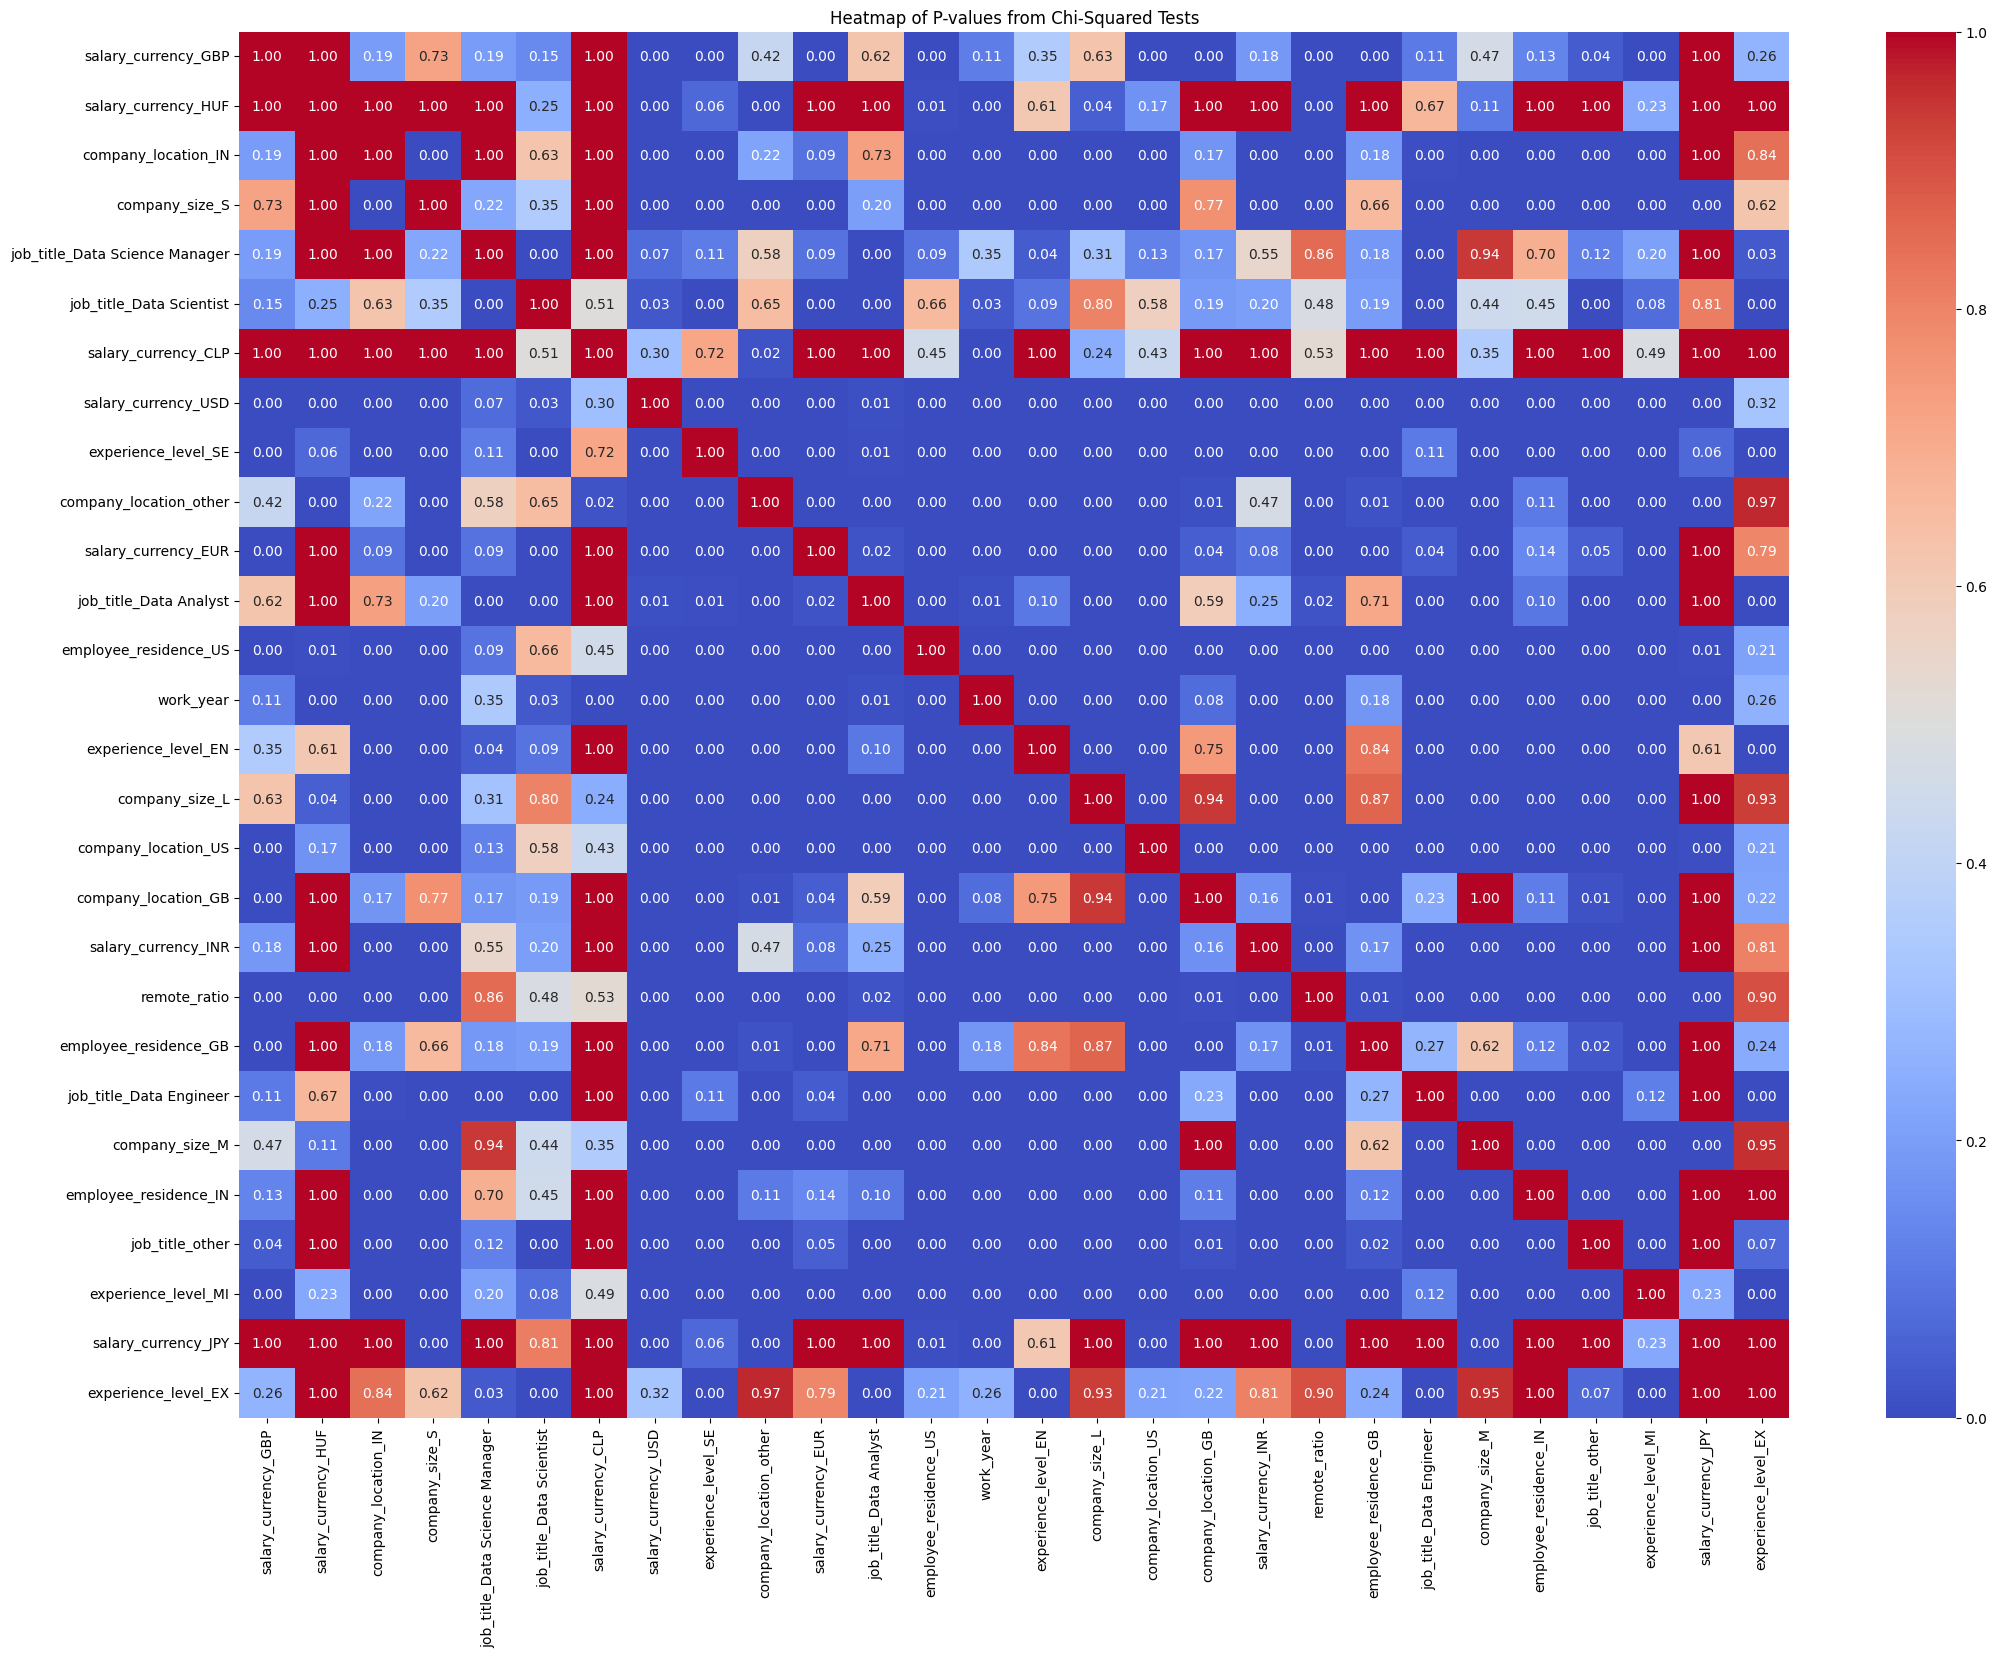

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency



# Considering selected features for calculating p-values 
categorical_variables = list(selected_features)


# Initialize an empty DataFrame for storing p-values
p_values = pd.DataFrame(index=categorical_variables, columns=categorical_variables)

# Calculate p-values for each pair of variables
for var1 in categorical_variables:
    for var2 in categorical_variables:
        if var1 != var2:
            contingency_table = pd.crosstab(X_encoded[var1], X_encoded[var2])
            _, p, _, _ = chi2_contingency(contingency_table)
            p_values.loc[var1, var2] = p
        else:
            p_values.loc[var1, var2] = 1  # Diagonal elements

# Convert p-values to float
p_values = p_values.astype(float)

# Create the heatmap
plt.figure(figsize=(25, 18))
sns.heatmap(p_values, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of P-values from Chi-Squared Tests')
plt.show()


From above, we can say that there are few variables which are depedent on other variables.

Diagonal cells where a variable is tested against itself are always 1, which is expected since a variable is always perfectly associated with itself.

Cells with a p-value close to 1 (colored in blue) suggest there is no significant association between the variables, indicating they are likely independent of each other.

## Which predictor variables are the most important?

In [83]:

# Correlation Analysis with target variable Salary
correlation_with_salary = X_encoded.join(y).corr()['salary'].sort_values(key=abs, ascending=False)
correlation_with_salary = correlation_with_salary.drop('salary') 

#  Feature Importance from Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_encoded, y)

feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Recursive Feature Elimination (RFE)
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=1)  
selector = selector.fit(X_encoded, y)

# Finding the most important features
rfe_ranking = pd.DataFrame({
    'Feature': X_encoded.columns,
    'RFE_Ranking': selector.ranking_
}).sort_values(by='RFE_Ranking')

# Results- Top 10 Features
feature_importances.head(10), rfe_ranking.head(10)


(                           Feature  Importance
 42             salary_currency_CLP    0.384672
 48             salary_currency_HUF    0.220386
 50             salary_currency_INR    0.155221
 51             salary_currency_JPY    0.107381
 5              experience_level_SE    0.042434
 1                     remote_ratio    0.015019
 3              experience_level_EX    0.012769
 0                        work_year    0.010136
 24  job_title_Data Science Manager    0.007237
 4              experience_level_MI    0.004078,
                 Feature  RFE_Ranking
 42  salary_currency_CLP            1
 48  salary_currency_HUF            2
 51  salary_currency_JPY            3
 50  salary_currency_INR            4
 49  salary_currency_ILS            5
 55  salary_currency_THB            6
 52  salary_currency_MXN            7
 47  salary_currency_HKD            8
 44  salary_currency_DKK            9
 56  salary_currency_TRY           10)

 company_location_IN,company_location_other,company_location_US,company_location_CA,company_location_DE,company_location_GB,company_location_FR,company_location_GR,company_location_ES,employee_residence_IN These are the most important varibles.

## Do the ranges of the predictor variables make sense?

In [84]:
df_total.describe()

,work_year,remote_ratio,salary
count,3755.000000,3755.000000,3.755000e+03
mean,2022.373635,46.271638,1.906956e+05
std,0.691448,48.589050,6.716765e+05
min,2020.000000,0.000000,6.000000e+03
25%,2022.000000,0.000000,1.000000e+05
50%,2022.000000,0.000000,1.380000e+05
75%,2023.000000,100.000000,1.800000e+05
max,2023.000000,100.000000,3.040000e+07


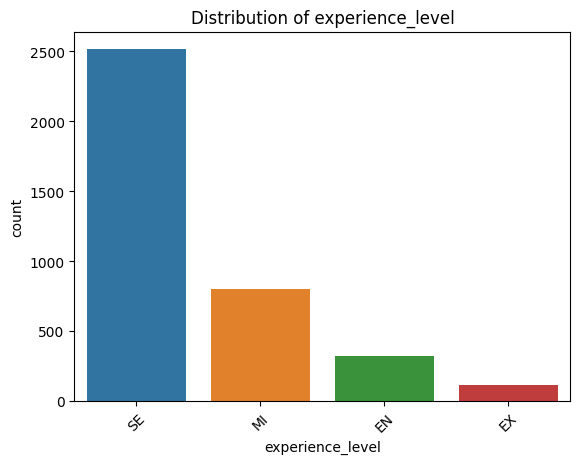

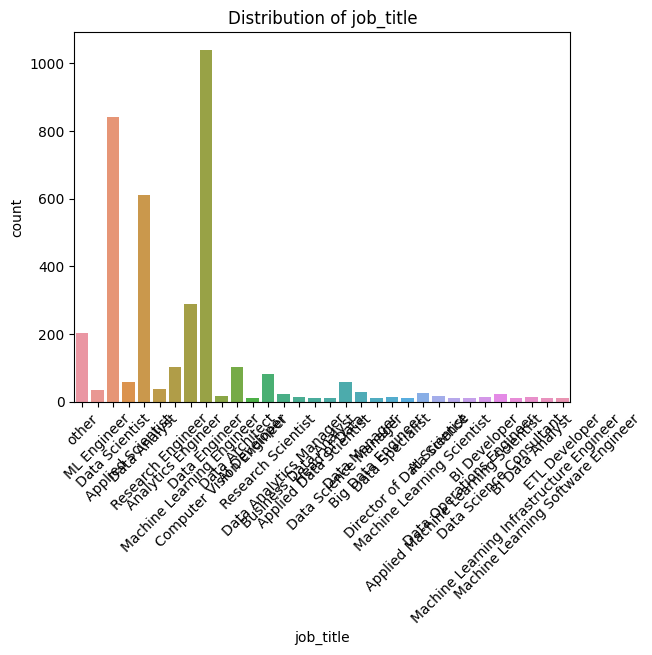

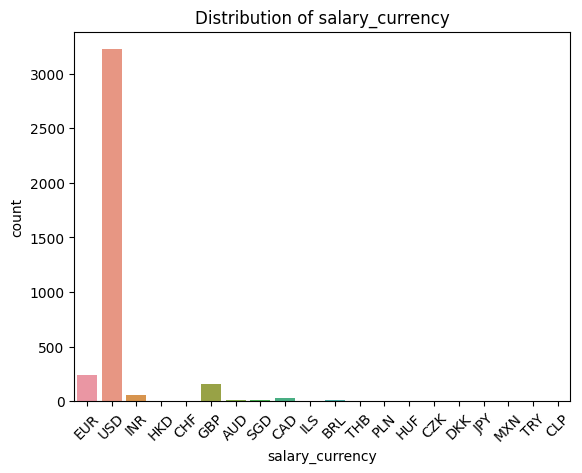

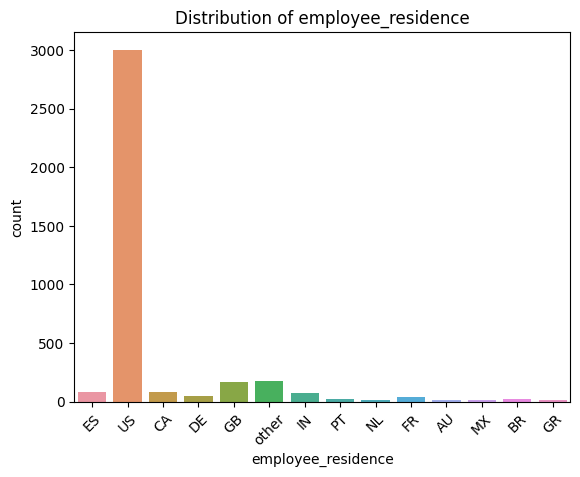

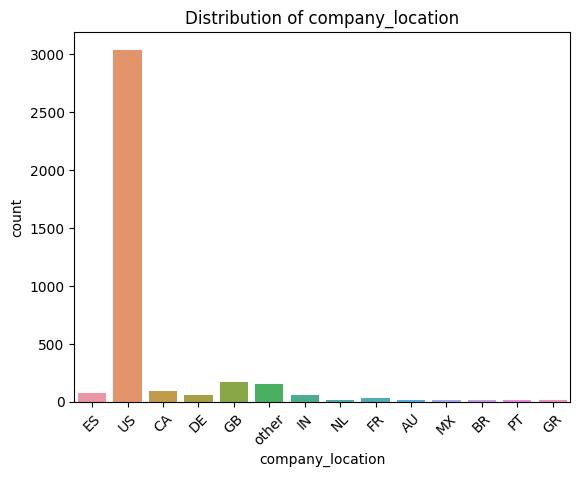

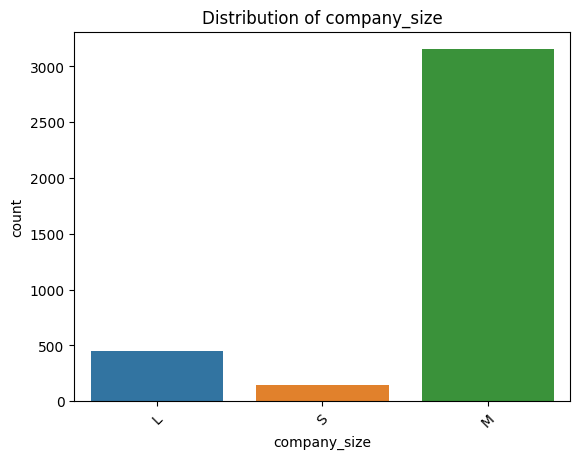

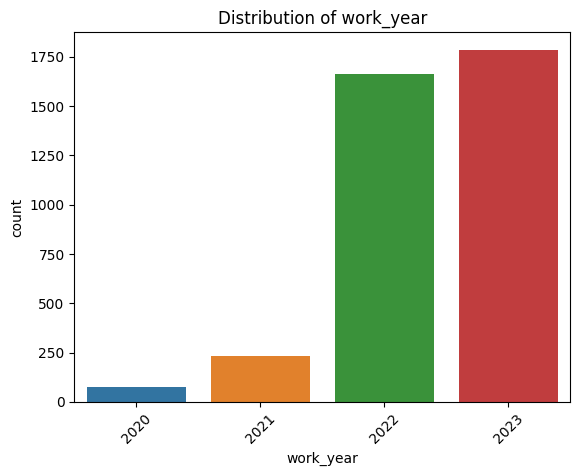

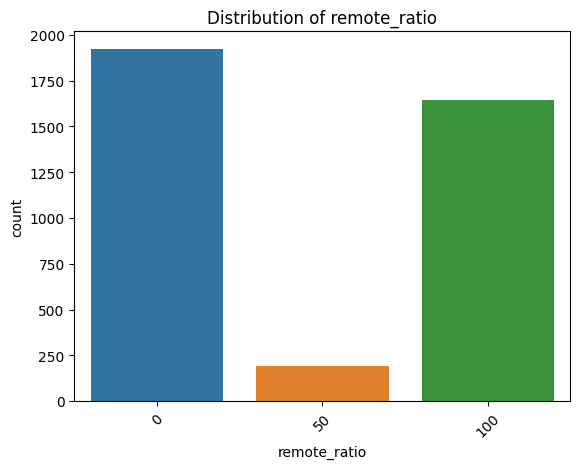

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


# For multiple categorical variables, plotting graphs
for column in df.select_dtypes(include=['category', 'object']).columns:
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

num_vars = ['work_year','remote_ratio']

for col in num_vars:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

'work_year':
The years range from 2020 to 2022, which is reasonable for a recent dataset.

'remote_ratio':
Values range from 0 to 100, which is expected as this likely represents the percentage of remote work. The three distinct groupings (0, 50, 100) suggest categorical nature rather than continuous.

'Company Size': It has 3 sizes 'L','M' and 's'.

The range of all the predictor variables seems reasonable.

## What are the distributions of the predictor variables?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


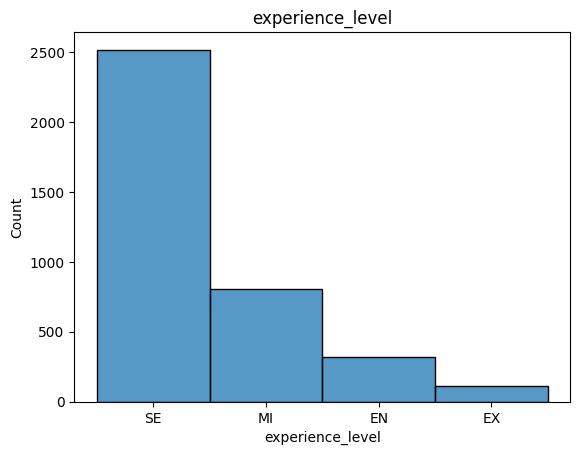

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


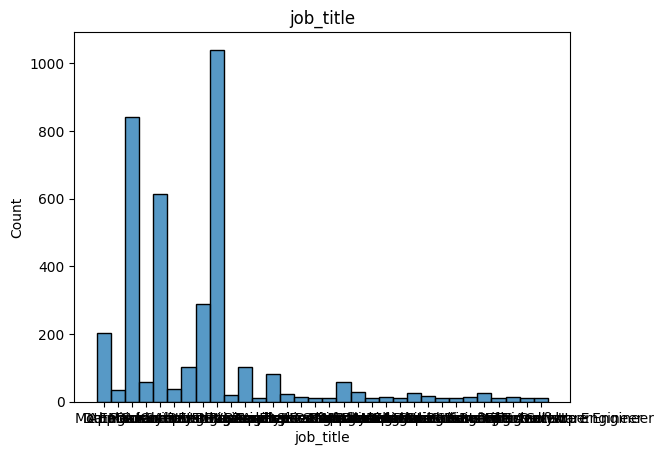

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


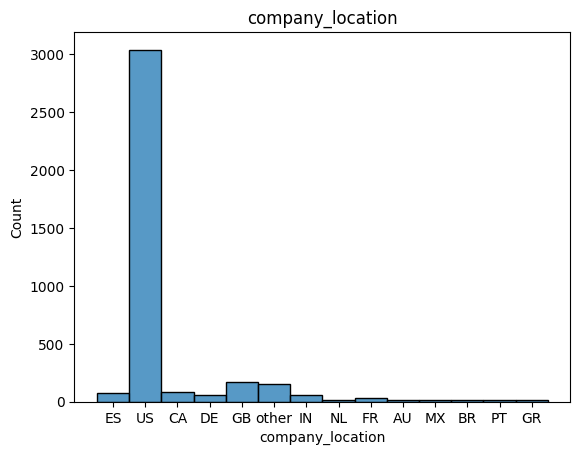

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


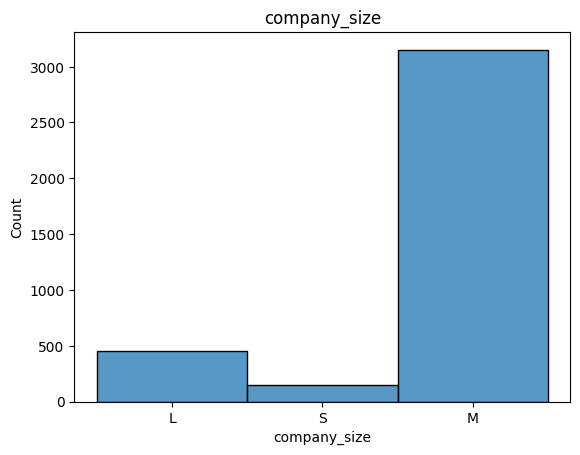

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


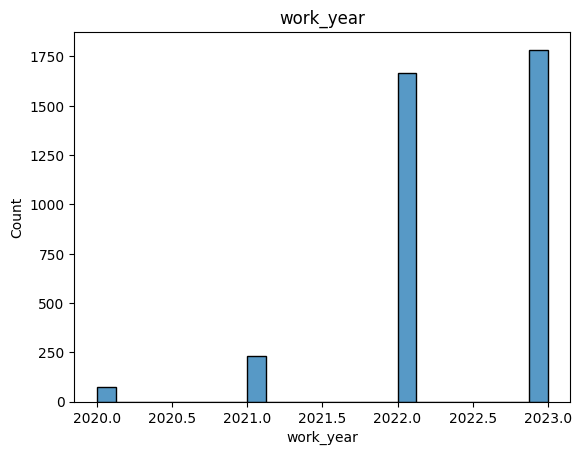

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


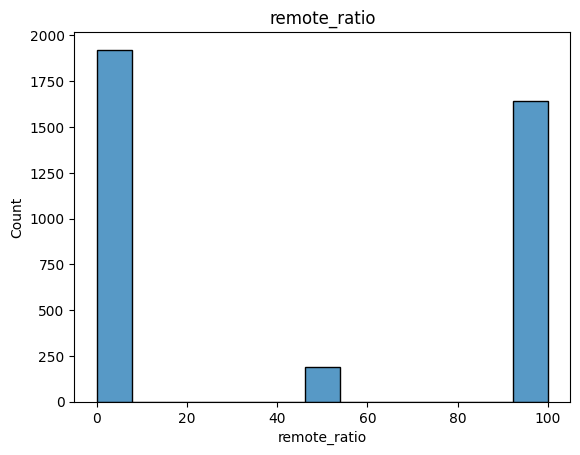

In [86]:
num_vars = ['experience_level', 'job_title','company_location', 'company_size','work_year','remote_ratio']

for col in num_vars:
    sns.histplot(df[col], kde=False)
    plt.title(col)
    plt.show()
    

1.company size:
This histogram shows three distinct bars. This indicates that the 'company size' variable represents categorical data.

2.work_year Distribution: 
The distribution is very unusual as it appears to be multi-modal with significant spikes.

3.remote_ratio Distribution: 
This histogram shows three distinct bars, which might indicate that the 'remote_ratio' variable represents categorical or discrete numerical data.

4.experience_level
The distribution seems slightly right-skewed,where most of the data points are concentrated on the left side (lower values), with the tail of the distribution extending to the right (towards higher values)

5.job_title
The distribution appears to be multi-modal with significant spikes.

6.company_location
This indicates that the 'company_location size' variable represents categorical data.

## Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [87]:
df_total.head()

,work_year,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,job_title_AI Developer,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,...,company_location_IN,company_location_MX,company_location_NL,company_location_PT,company_location_US,company_location_other,company_size_L,company_size_M,company_size_S,salary
0,2023,100,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,80000
1,2023,100,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,30000
2,2023,100,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,25500
3,2023,100,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,175000
4,2023,100,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,120000


In [88]:
# Re-defining categorical and numerical columns
numerical_columns = ['work_year','remote_ratio','salary']

# Re-removing outliers and re-defining target and predictors for cleaned dataset
def remove_outliers(df, column_names):
    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

ds_no_outliers = remove_outliers(df_total, numerical_columns)
y_no_outliers = ds_no_outliers['salary']
X_no_outliers = ds_no_outliers.drop('salary', axis=1)

# Re-splitting the datasets into train and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X_encoded, y, train_size=0.8, test_size=0.2, random_state=0)
X_train_no_outliers, X_valid_no_outliers, y_train_no_outliers, y_valid_no_outliers = train_test_split(X_no_outliers, y_no_outliers, train_size=0.8, test_size=0.2, random_state=0)

In [89]:
len(ds_no_outliers)

3578

In [90]:
#training the Linear Regression model on both the original and the cleaned datasets and then evaluate their performances
#using R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE).

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Re-defining categorical and numerical columns
all_predictor_features = list(selected_features)
all_predictor_features.remove('work_year')
all_predictor_features.remove('remote_ratio')
categorical_columns = all_predictor_features
numerical_columns = ['work_year','remote_ratio','salary']


# Re-defining the model and pipeline
model = LinearRegression()

# Function to train and evaluate the model
def train_and_evaluate(X_train, y_train, X_valid, y_valid):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    preds = model.predict(X_valid)

    # Evaluate the model
    mae = mean_absolute_error(y_valid, preds)
    mse = mean_squared_error(y_valid, preds)
    r2 = r2_score(y_valid, preds)

    return mae, mse, r2

# Train and evaluate the model on the original dataset
mae_original, mse_original, r2_original = train_and_evaluate(X_train, y_train, X_valid, y_valid)

# Train and evaluate the model on the dataset without outliers
mae_no_outliers, mse_no_outliers, r2_no_outliers = train_and_evaluate(X_train_no_outliers, y_train_no_outliers, X_valid_no_outliers, y_valid_no_outliers)

print("With outliers results: ")
print(f"MAE: {mae_original}, MSE: {mse_original}")

print("Without outliers results: ")
print(f"MAE: {mae_no_outliers}, MSE: {mse_no_outliers}")

# mae_original, mse_original, r2_original, mae_no_outliers, mse_no_outliers, r2_no_outliers

With outliers results: 
MAE: 392987561202.32227, MSE: 1.159838115749242e+26
Without outliers results: 
MAE: 36187.91529729627, MSE: 2138779118.6137354


Mean Absolute Error (MAE):

With outliers: The MAE is quite high at 175,438.55, which indicates that on average, the model's predictions are off by this amount from the actual values.

Without outliers: The MAE drops significantly to 30,004.34, showing that the predictions are much closer to the actual values on average when outliers are removed from the dataset.
Mean Squared Error (MSE):

With outliers: The MSE is extremely large at 140,019,922,249.22, suggesting that there are substantial errors in the predictions, likely influenced by the presence of outliers that skew the error metric.

Without outliers: The MSE decreases drastically to 1,638,591,474.42, reflecting a model that makes predictions with much smaller errors.

## Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [91]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

#ds_salaries=pd.read_csv("https://raw.githubusercontent.com/pradnyashinde164/Data-Science-Job-Salaries-Prediction/main/ds_salaries.csv")
ds_salaries=df
# Define percentages and numerical columns
percentages = [0.01, 0.05, 0.10]
numerical_columns = ['work_year','remote_ratio']

# Function to remove data and store original values
def remove_data_and_store_original(df, percentage):
    np.random.seed(0)
    df_copy = df.copy(deep=True)
    original_values = []
    num_values = int(df.size * percentage)
    indices_to_remove = [(i, j) for i in range(df.shape[0]) for j in range(df.shape[1])]
    np.random.shuffle(indices_to_remove)
    indices_to_remove = indices_to_remove[:num_values]
    for i, j in indices_to_remove:
        original_values.append((i, j, df_copy.iat[i, j]))
        df_copy.iat[i, j] = np.nan
    return df_copy, original_values

# Impute and Evaluate
for perc in percentages:
    df_with_missing, original_values = remove_data_and_store_original(ds_salaries[numerical_columns], perc)

    # Using Mean Imputation
    mean_imputer = SimpleImputer(strategy='mean')
    df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(df_with_missing), columns=numerical_columns)

    # Using Median Imputation
    median_imputer = SimpleImputer(strategy='median')
    df_median_imputed = pd.DataFrame(median_imputer.fit_transform(df_with_missing), columns=numerical_columns)

    # Using k-NN Imputation
    knn_imputer = KNNImputer(n_neighbors=5)
    df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_with_missing), columns=numerical_columns)

    # Evaluating each imputation method
    for imputed_df, method in zip([df_mean_imputed, df_median_imputed, df_knn_imputed], ['Mean', 'Median', 'k-NN']):
        residuals = [original_value[2] - imputed_df.iat[original_value[0], original_value[1]] for original_value in original_values]
        mse = mean_squared_error([original_value[2] for original_value in original_values], [imputed_df.iat[original_value[0], original_value[1]] for original_value in original_values])
        bias = np.mean(residuals)
        variance = np.var(residuals)
        print(f"Percentage: {perc * 100}%, Method: {method}, MSE: {mse}, Bias: {bias}, Variance: {variance}")

Percentage: 1.0%, Method: Mean, MSE: 1416.7943882912216, Bias: -1.1136721273483976, Variance: 1415.5541226839885
Percentage: 1.0%, Method: Median, MSE: 2566.866666666667, Bias: 26.2, Variance: 1880.4266666666667
Percentage: 1.0%, Method: k-NN, MSE: 1488.1365333333333, Bias: -4.101333333333351, Variance: 1471.3155982222222
Percentage: 5.0%, Method: Mean, MSE: 1229.834822932889, Bias: 0.5387895295261473, Variance: 1229.544528775762
Percentage: 5.0%, Method: Median, MSE: 2380.304, Bias: 24.629333333333335, Variance: 1773.6999395555563
Percentage: 5.0%, Method: k-NN, MSE: 1879.1526533570936, Bias: 6.732471488441804, Variance: 1833.8264810144117
Percentage: 10.0%, Method: Mean, MSE: 1151.5529474127302, Bias: -0.5328563666396504, Variance: 1151.2690115052617
Percentage: 10.0%, Method: Median, MSE: 2150.7882822902798, Bias: 22.322237017310254, Variance: 1652.5060168333027
Percentage: 10.0%, Method: k-NN, MSE: 1269.3267231492478, Bias: -6.556073049279832, Variance: 1226.3446293217544


The mean imputation performed relatively consistently across different levels of missing data, maintaining a low MSE and variance, indicating it has a stable performance in this dataset.

The median imputation consistently showed higher MSE and variance than mean imputation, which suggests it may not be as robust in this particular context, especially as the amount of missing data increases.

The k-NN imputation showed mixed results. At lower levels of missing data, it performed comparably to mean imputation but was less consistent. At higher levels of missing data, its performance was better than median imputation and comparable to mean imputation.

## Calculate the accuracy and a confusion matrix.

As this is a Regression problem, I have calculated accuracy of my predictions using LinearRegression and RandomForestRegressor 

In [92]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=45)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=45)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# # Output the predictions
# print(y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 31117670578.39737
R-squared Score: 0.8578957099956916


An R-squared Score of 0.7985487210345342 means that approximately 79.85% of the variance in the dependent variable is accounted for by the model. This is generally considered a high R-squared value and suggests that the model explains a large portion of the variability in the outcome variable.

In [93]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=45)

# Initialize the Random Forest Regressor
rf_regressor = LinearRegression()

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# # Output the predictions
# print(y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 38451041126.31691
R-squared Score: 0.8244065896444381


An R-squared Score of 0.8510930416383474 means that approximately 85.10% of the variance in the dependent variable is accounted for by the model. This is generally considered a high R-squared value and suggests that the model explains a large portion of the variability in the outcome variable.

## Conclusion:

In conclusion, we developed a Linear Regression model to predict the salaries of various data roles, focusing on key predictor variables such as company location, company size, job title, and employee location. The model achieved an R-squared score of 85%, indicating that it can explain a significant portion of the variance in the salaries based on these predictors.

Key Findings:

The R-squared value of 85% suggests that our model is reasonably effective in capturing the relationship between the predictor variables and the salary.
The chosen predictors - company location, experience level, job title, and employee residence - appear to be relevant and significant in determining the salary structure in data roles.

Areas for Improvement:

While the current model shows promising results, there is room for enhancement. Hyperparameter tuning can be used to further improve the model accuracy.

## References:

1.Kaggle Dataset: https://www.kaggle.com/code/khunnurjirao/data-science-job-salaries-prediction/data

2.https://seaborn.pydata.org/generated/seaborn.objects.Plot.html

3.Documentation of scikit-learn 0.21.3 : https://scikit-learn.org/0.21/modules/feature_selection.html

4.matplotlib development team. matplotlib v3.3.4 documentation: https://matplotlib.org/stable/plot_types/index.html

5.https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

In [ ]:
# Create a sample input for prediction
sample_input = pd.DataFrame({
    'work_year': [2023],
    'remote_ratio': [100],
    'experience_level_EN': [False],
    'experience_level_EX': [False], 
    'experience_level_MI': [True],
    'experience_level_SE': [False],
    'job_title_Data Analyst': [True],
    'job_title_Data Engineer': [False],
    'job_title_Data Science Manager': [False],
    'job_title_Data Scientist': [False],
    'job_title_other': [False],
    'company_location_GB': [False],
    'company_location_IN': [False],
    'company_location_US': [True],
    'company_location_other': [False],
    'company_size_L': [False],
    'company_size_M': [False], 
    'company_size_S': [True]
})

# Make prediction
predicted_salary = model.predict(sample_input)

print("Predicted salary for a Mid-Level Data Analyst in US (Remote, Small Company):")
print(f"${predicted_salary[0]:,.2f}")
